Goal: Familiarize myself with the ARA dataset before attempting to build prediction models.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [3]:
measurements = pd.read_csv(
  "../data/clean/ara_measurements_clean.csv",
  parse_dates=[
    'sample_dt',
    'prescribed_collection_date'
  ]
)

Subset to parts of data you are likely to use.
- Remove the observations that are follow ups.
- Check the other groupings if anything needs to be removed.

In [4]:
orig_len = len(measurements)
measurements = measurements[measurements['follow_up'] == False]
print(f"Lost {orig_len - len(measurements)} observations.")

Lost 1707 observations.


Find unique identifier

Observations over time

- Mark visist as follow up using two day rule, or check that this is the case. You may want to only use non follow up visits

C:\Users\squaade\AppData\Local\Temp\ipykernel_35812\3979533783.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  measurements['month_year'] = measurements['sample_dt'].dt.to_period('M').astype(str)


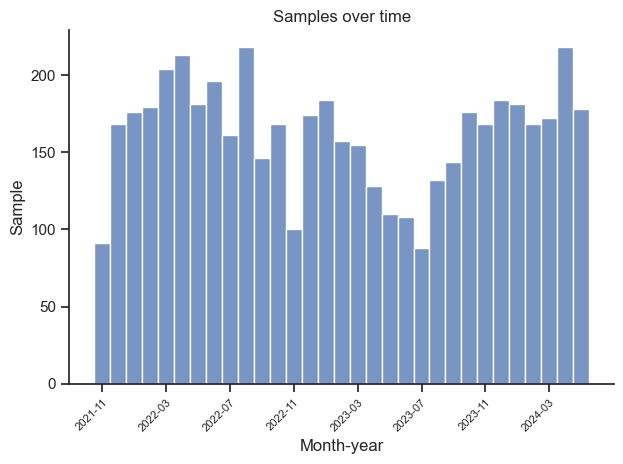

In [5]:
measurements['month_year'] = measurements['sample_dt'].dt.to_period('M').astype(str)
ara_notnull = measurements[measurements['sample_dt'].notna()]
ara_notnull = ara_notnull.sort_values('month_year')
sns.histplot(data=ara_notnull, x='month_year')
xtick_months = ara_notnull['month_year'].unique() # Get unique month-year values in the correct order
plt.xticks(
  ticks=range(0, len(xtick_months), 4),  # Every fourth month
  labels=xtick_months[::4],
  rotation=45,
  rotation_mode='anchor',
  fontsize=8,
  ha='right'
)
plt.title('Samples over time')
plt.xlabel('Month-year')
plt.ylabel('Sample')
plt.tight_layout()
plt.show()

It doesn't look like there are particular seasons where there are more/less samples, although this could pop up at a more granular level, for instance spatial correlations with sampling times.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

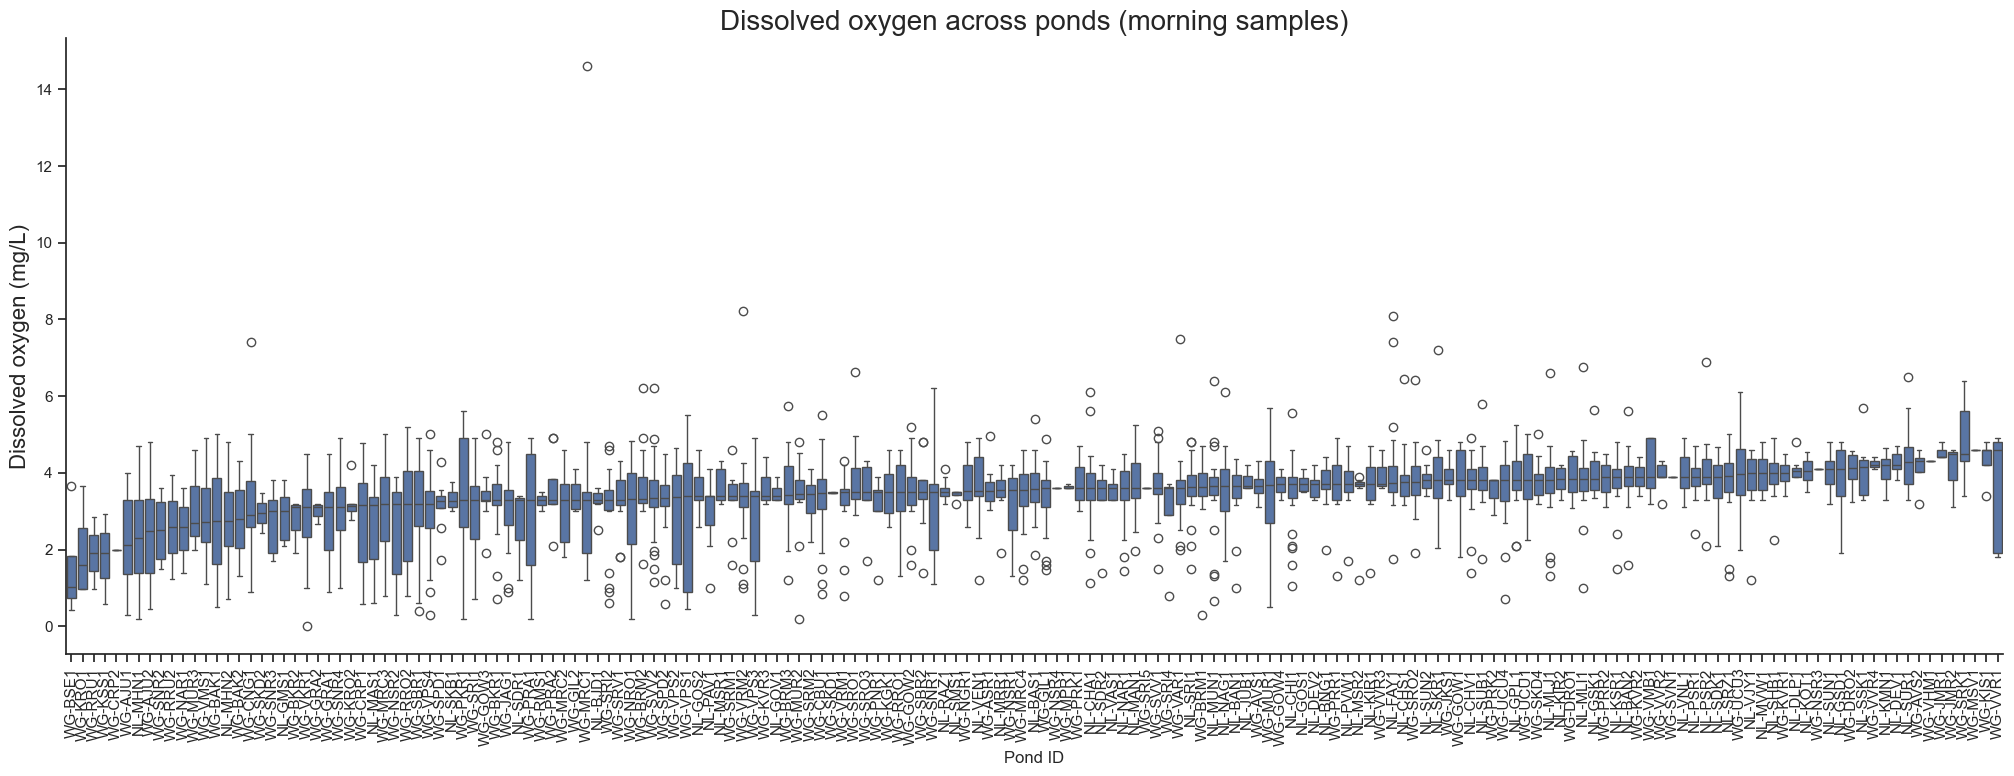

In [6]:
ara_morning = measurements[measurements['time_of_day'] == 'morning']
sort_idx = ara_morning.groupby('pond_id')['do_mg_per_L'].median().sort_values().index

# Consider adding color for control group
fig = plt.figure(figsize=(25, 8))
sns.boxplot(ara_morning, x='pond_id', y='do_mg_per_L', order=sort_idx)
plt.title("Dissolved oxygen across ponds (morning samples)", fontsize=20)
plt.xlabel("Pond ID")
plt.ylabel('Dissolved oxygen (mg/L)', fontsize=16)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

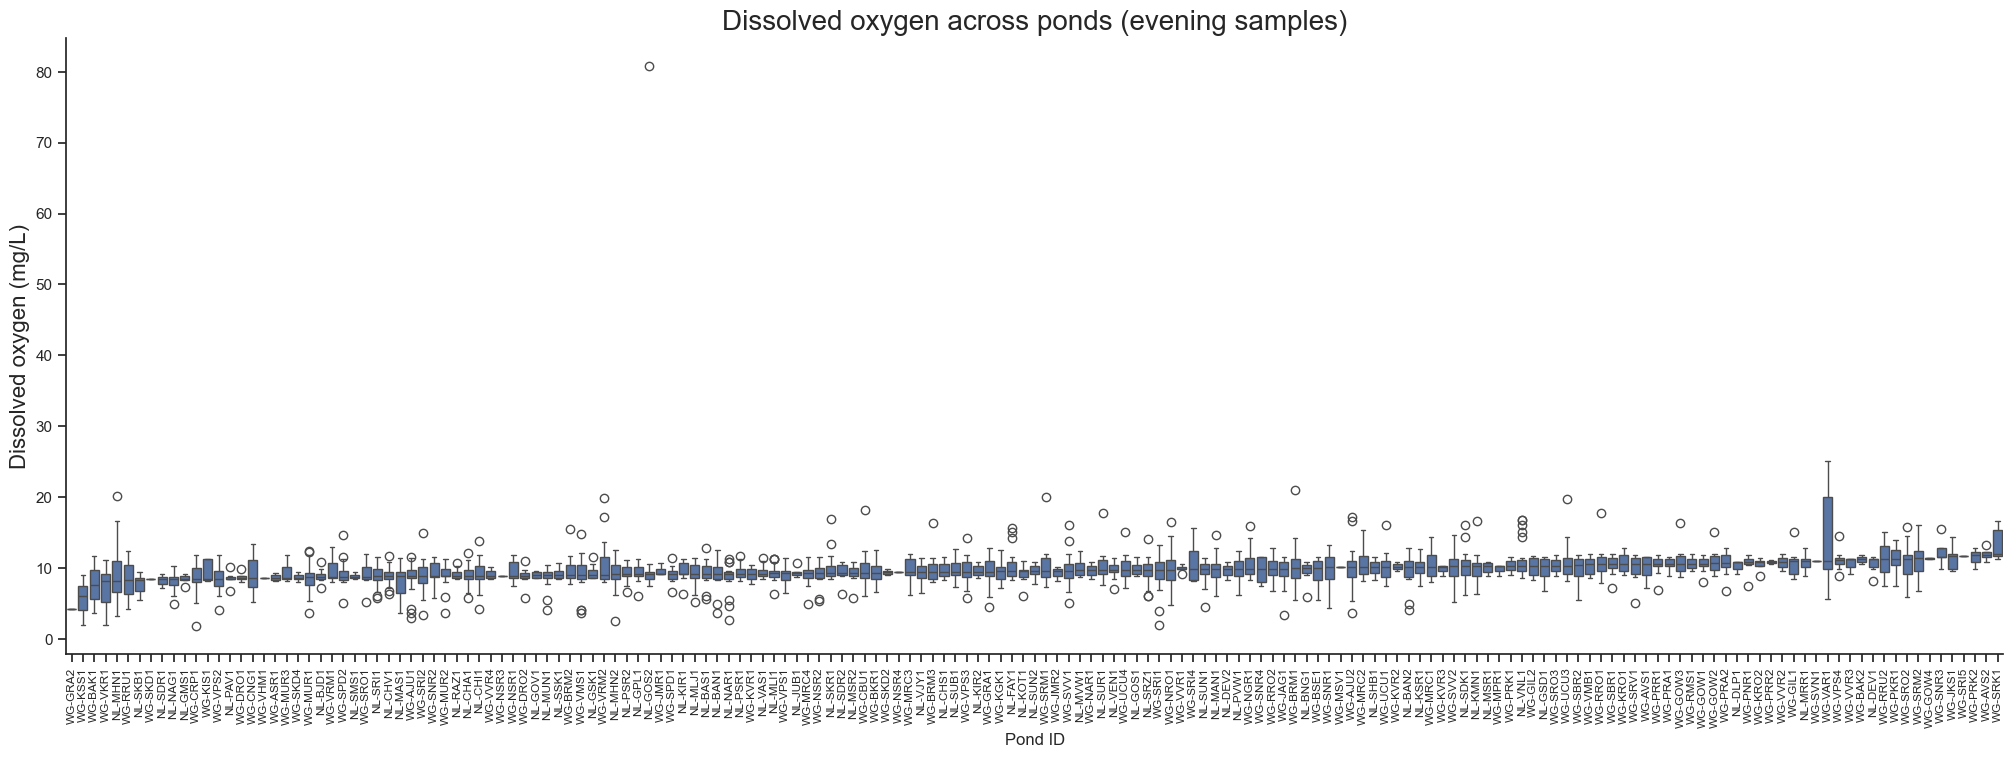

In [7]:
ara_evening = measurements[measurements['time_of_day'] == 'evening']
sort_idx = ara_evening.groupby('pond_id')['do_mg_per_L'].median().sort_values().index

# Consider adding color for control group
fig = plt.figure(figsize=(25, 8))
sns.boxplot(ara_evening, x='pond_id', y='do_mg_per_L', order=sort_idx)
plt.title("Dissolved oxygen across ponds (evening samples)", fontsize=20)
plt.xlabel("Pond ID")
plt.ylabel('Dissolved oxygen (mg/L)', fontsize=16)
plt.xticks(rotation=90, fontsize=8.5)

- Inspect the above outlier. It could be an error

Can also do a plot with morning and evening on the same with a gap

[Text(0.5, 1.0, 'Observations per pond histogram'),
 Text(0.5, 0, 'Num observations'),
 Text(0, 0.5, 'Ponds')]

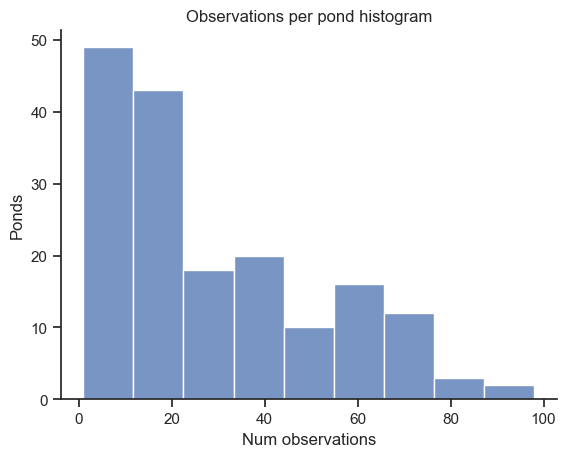

In [8]:
# Samples per pond
sample_summary = measurements.groupby('pond_id').count() # May want to filter no sample data
sns.histplot(sample_summary, x='sample_dt').set(
  title='Observations per pond histogram',
  xlabel='Num observations',
  ylabel='Ponds'
)

- Group observations from the same day
- Make variable that says whether morning, evening, or both

Most farms are sampled both in the morning and evening when visited

<Axes: >

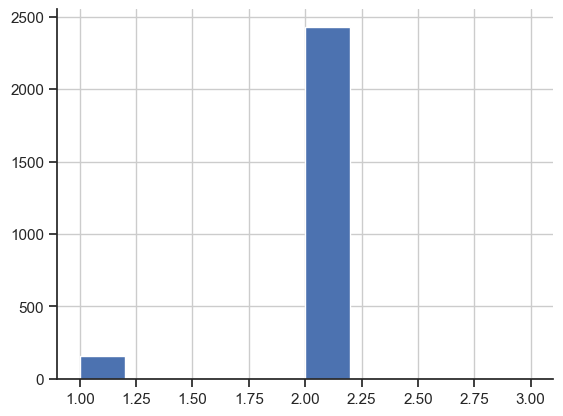

In [9]:
measurements['sample_date'] = measurements['sample_dt'].dt.date
measurements.groupby(['pond_id', 'sample_date']).size().hist()
# ara.groupby(['pond_id', 'sample_date', 'time_of_day']).size()

<Axes: >

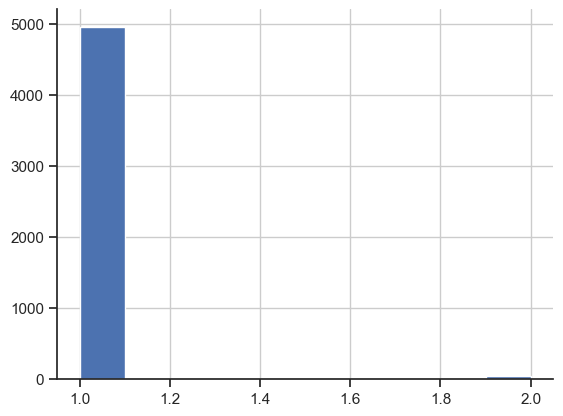

In [10]:
measurements.groupby(['pond_id', 'sample_date', 'time_of_day']).size().hist()

Plot summarizing timing of visit across ponds

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

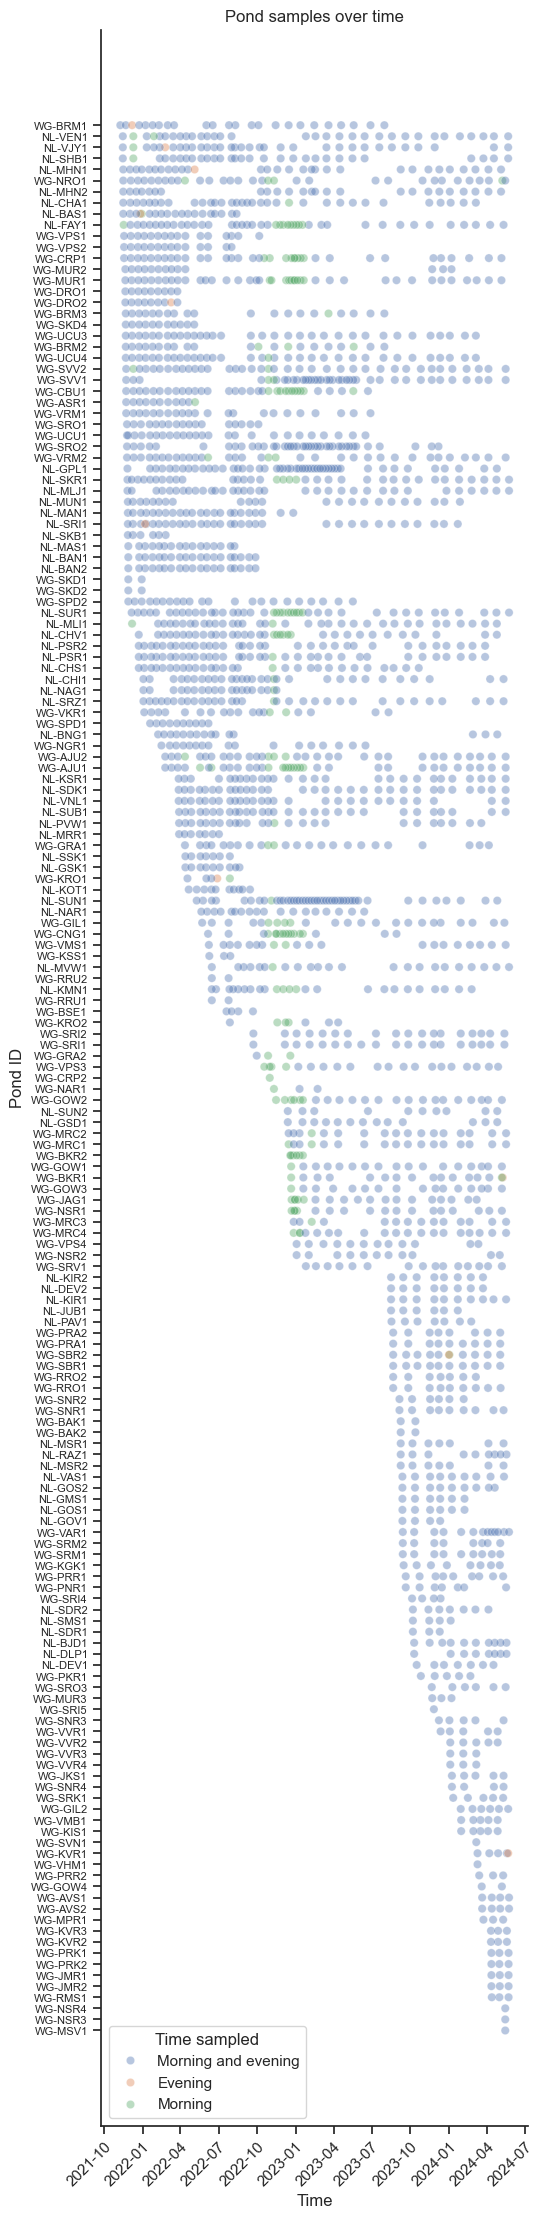

In [11]:
def summarize_time_of_day(x: pd.Series) -> str:
  if (x == 'morning').any() and (x == 'evening').any():
    return 'Morning and evening'
  if (x == 'morning').any() and (x != 'evening').all():
    return 'Morning'
  if (x != 'morning').all() and (x == 'evening').any():
    return 'Evening'
  if (x != 'morning').all() and (x != 'evening').all():
    return ''

ara_one_day = measurements \
  .groupby(['pond_id', 'sample_date'])['time_of_day'] \
  .apply(summarize_time_of_day) \
  .reset_index()

order_idx = ara_one_day.groupby('pond_id')['sample_date'].transform('first').sort_values().index
ara_one_day = ara_one_day.loc[order_idx]

fig = plt.figure(figsize=(6, 22))
sns.scatterplot(ara_one_day,
                x='sample_date',
                y='pond_id',
                hue='time_of_day',
                alpha=.4)
plt.title('Pond samples over time')
plt.xlabel('Time')
plt.ylabel('Pond ID')
plt.legend(title='Time sampled')
plt.tight_layout()
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
plt.yticks(fontsize=8)

- Some ponds are samples more consistently while others come in and out of the sample
- You may want to check whether there are seasonal trends to pond sampling, especially trends that are correlated with their spatial locations.

Water quality parameter analysis

In [12]:
WQ_RANGES = {
    'do_mg_per_L': {
        'required': {
            'morning': (3, 5),
            'evening': (8, 12)
        },
        'ideal': {
            'morning': (3, 5),
            'evening': (8, 10)
        }
    },
    'ph': {  # Can also do morning evening to have consistent interface
        'required': (6.5, 8.5),
        'ideal': (7, 8)
    },
    'ammonia_mg_per_L': {
        'required': (0, 0.5),
        'ideal': (0, 0.15)
    },
    'turbidity_cm': {
        'required': (20, 50),
        'ideal': (30, 40)
    }
}

In [13]:
def check_in_range(parameter: str, values: pd.Series, periods: pd.Series) -> pd.Series:
    """
    in_range if water quality parameter is within the required range.

    Parameters:
        parameter (str): The water quality parameter to check (e.g., 'do', 'ph', 'ammonia', 'turbidity').
        values (pd.Series): A series of measurement values.
        periods (pd.Series): A series of periods ('morning', 'evening', etc.).

    Returns:
        pd.Series: A boolean series indicating if each measurement is within the required range.
    """
    # Ensure the parameter is valid
    if parameter not in WQ_RANGES:
        raise ValueError(f"Invalid parameter: {parameter}. Must be one of {list(WQ_RANGES.keys())}.")
    
    # Extract the required ranges for the parameter
    required_ranges = WQ_RANGES[parameter]['required']
    
    # Handle cases where ranges are split by periods
    if isinstance(required_ranges, dict):  # Period-dependent ranges
        valid_periods = list(required_ranges.keys()) + [np.nan]
        if not periods.isin(valid_periods).all():
            invalid_periods = periods[~periods.isin(valid_periods)].unique()
            raise ValueError(f"Invalid period(s): {invalid_periods}. Must be one of {valid_periods}.")
        
        # Check in range for each period
        in_range = pd.Series(False, index=values.index)  # Initialize all False
        for period, (low, high) in required_ranges.items():
            in_range |= (periods == period) & values.between(low, high)
        in_range[values.isna() | periods.isna()] = np.nan
        return in_range
    
    # Handle cases where ranges are not split by periods
    low, high = required_ranges
    in_range = values.between(low, high)
    in_range[values.isna()] = np.nan

    return in_range

In [14]:
# Check whether WQ params in range
for wq_param in WQ_RANGES.keys():
  param_no_unit = wq_param.split('_', 1)[0]
  measurements[f"{param_no_unit}_in_req_range"] = check_in_range(wq_param, measurements[wq_param], measurements['time_of_day'])

C:\Users\squaade\AppData\Local\Temp\ipykernel_35812\180831361.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  in_range[values.isna() | periods.isna()] = np.nan
C:\Users\squaade\AppData\Local\Temp\ipykernel_35812\180831361.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  in_range[values.isna()] = np.nan
C:\Users\squaade\AppData\Local\Temp\ipykernel_35812\180831361.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  in_range[values.isna()] = np.nan
C:\Users\sq

Water quality across time

In [18]:
ara_long = measurements.melt(
    id_vars=['pond_id', 'sample_dt', 'time_of_day'],
    value_vars=['do_mg_per_L', 'ph', 'ammonia_mg_per_L', 'turbidity_cm'],
    var_name='wq_param',
    value_name='value'
)

Plots
- Box plots across ponds with the required range bands and number of observations would be nice
- Look at change in values over time. Don't group by pond ids

Need to disaggregate the below by the time of day

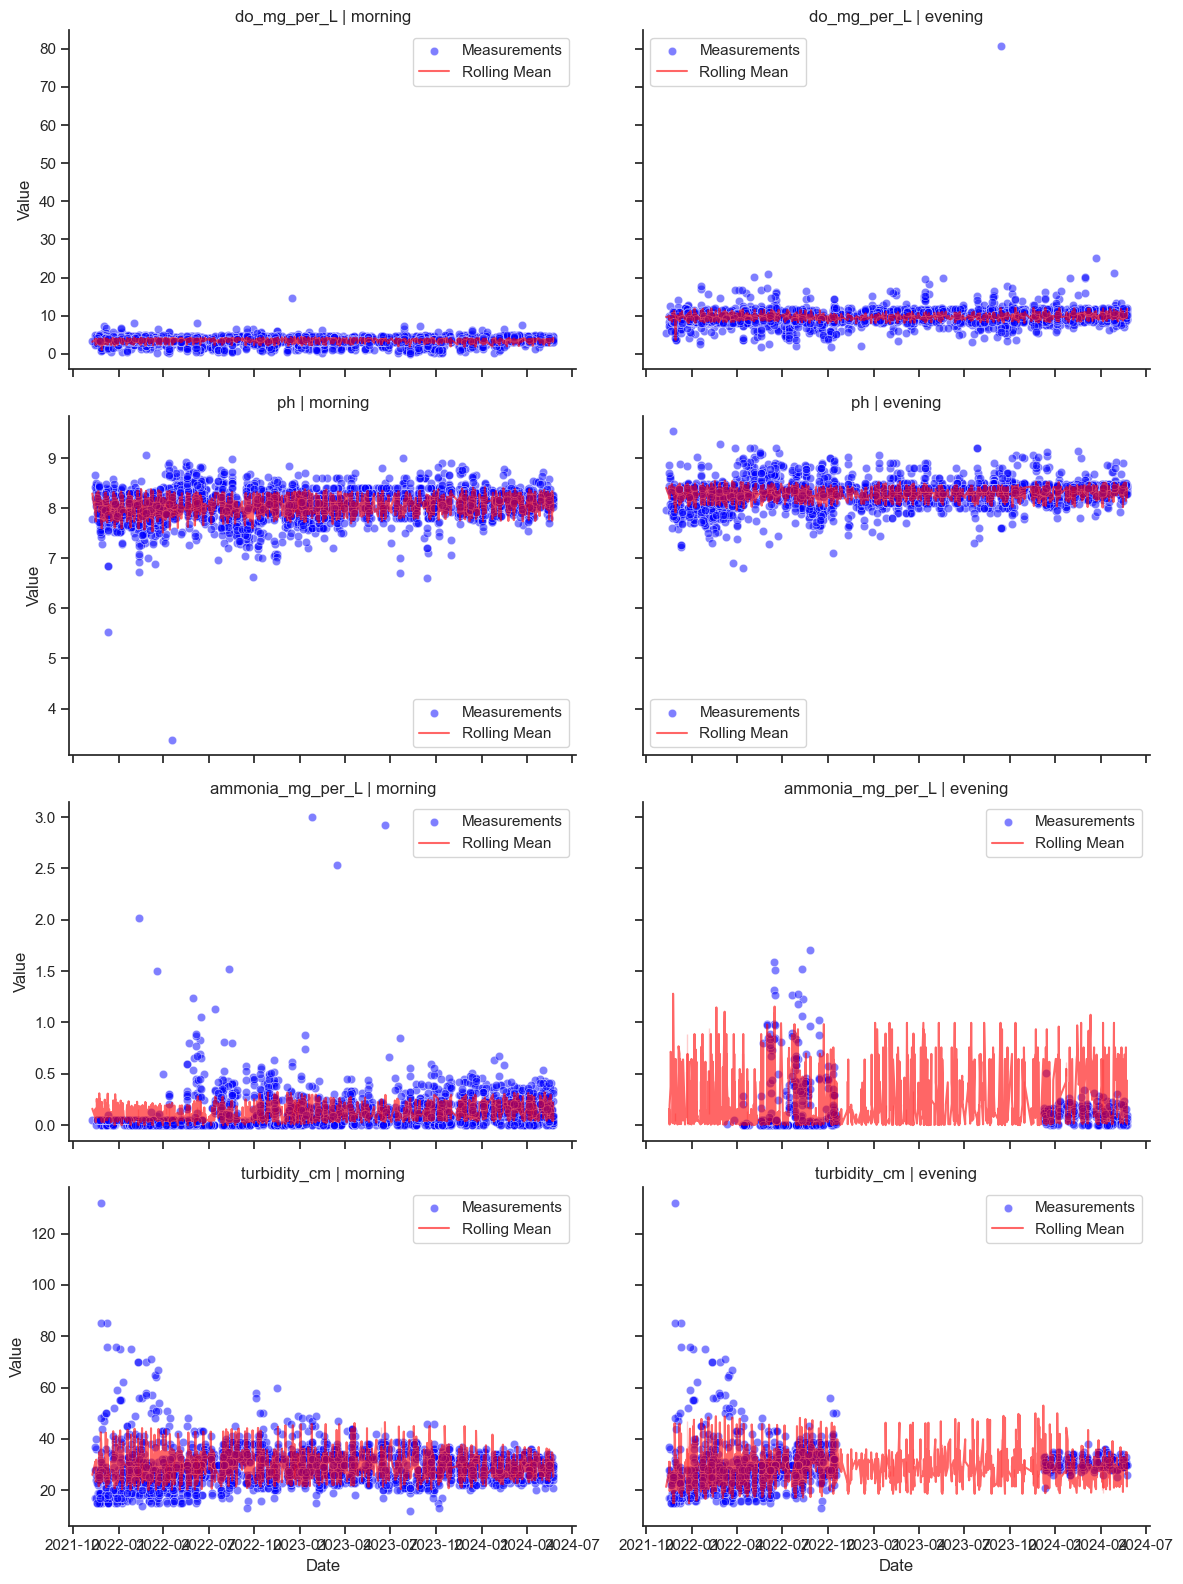

In [36]:
window_size = 30

def rolling_iqr(series, window):
  q1 = series.rolling(window=window, min_periods=1).quantile(0.25)
  q3 = series.rolling(window=window, min_periods=1).quantile(0.75)
  return q1, q3

# Calculate rolling mean and standard deviation
ara_long['rolling_mean'] = ara_long.groupby(['wq_param', 'time_of_day'])['value'].transform(
  lambda x: x.rolling(window=window_size, min_periods=1).mean()
)

# Create a FacetGrid plot
g = sns.FacetGrid(
  ara_long,
  col='time_of_day',
  row='wq_param',
  sharey='row',
  height=4,
  aspect=1.5
)

g.map_dataframe(
  sns.scatterplot,
  x="sample_dt", y="value", alpha=0.5, label="Measurements", color="blue"
)
g.map_dataframe(
  sns.lineplot,
  x="sample_dt", y="rolling_mean", label="Rolling Mean", color="red", alpha=0.6
)

# Adjust labels and legends
for ax in g.axes.flat:
  ax.legend(loc='best')

g.set_axis_labels("Date", "Value")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.tight_layout()

plt.show()

- We have a lot less ammonia measurements in the evening. We might need to predict at specific times of day
- The turbidity morning and evening measurements look far too similar, these are probably duplicated. You need to ask FWI about this.
- Confirm your understanding of the morning and evening measurements
- Stil hard to see seasonal trends

Maybe just do one where you look at the average and interquartile range over months

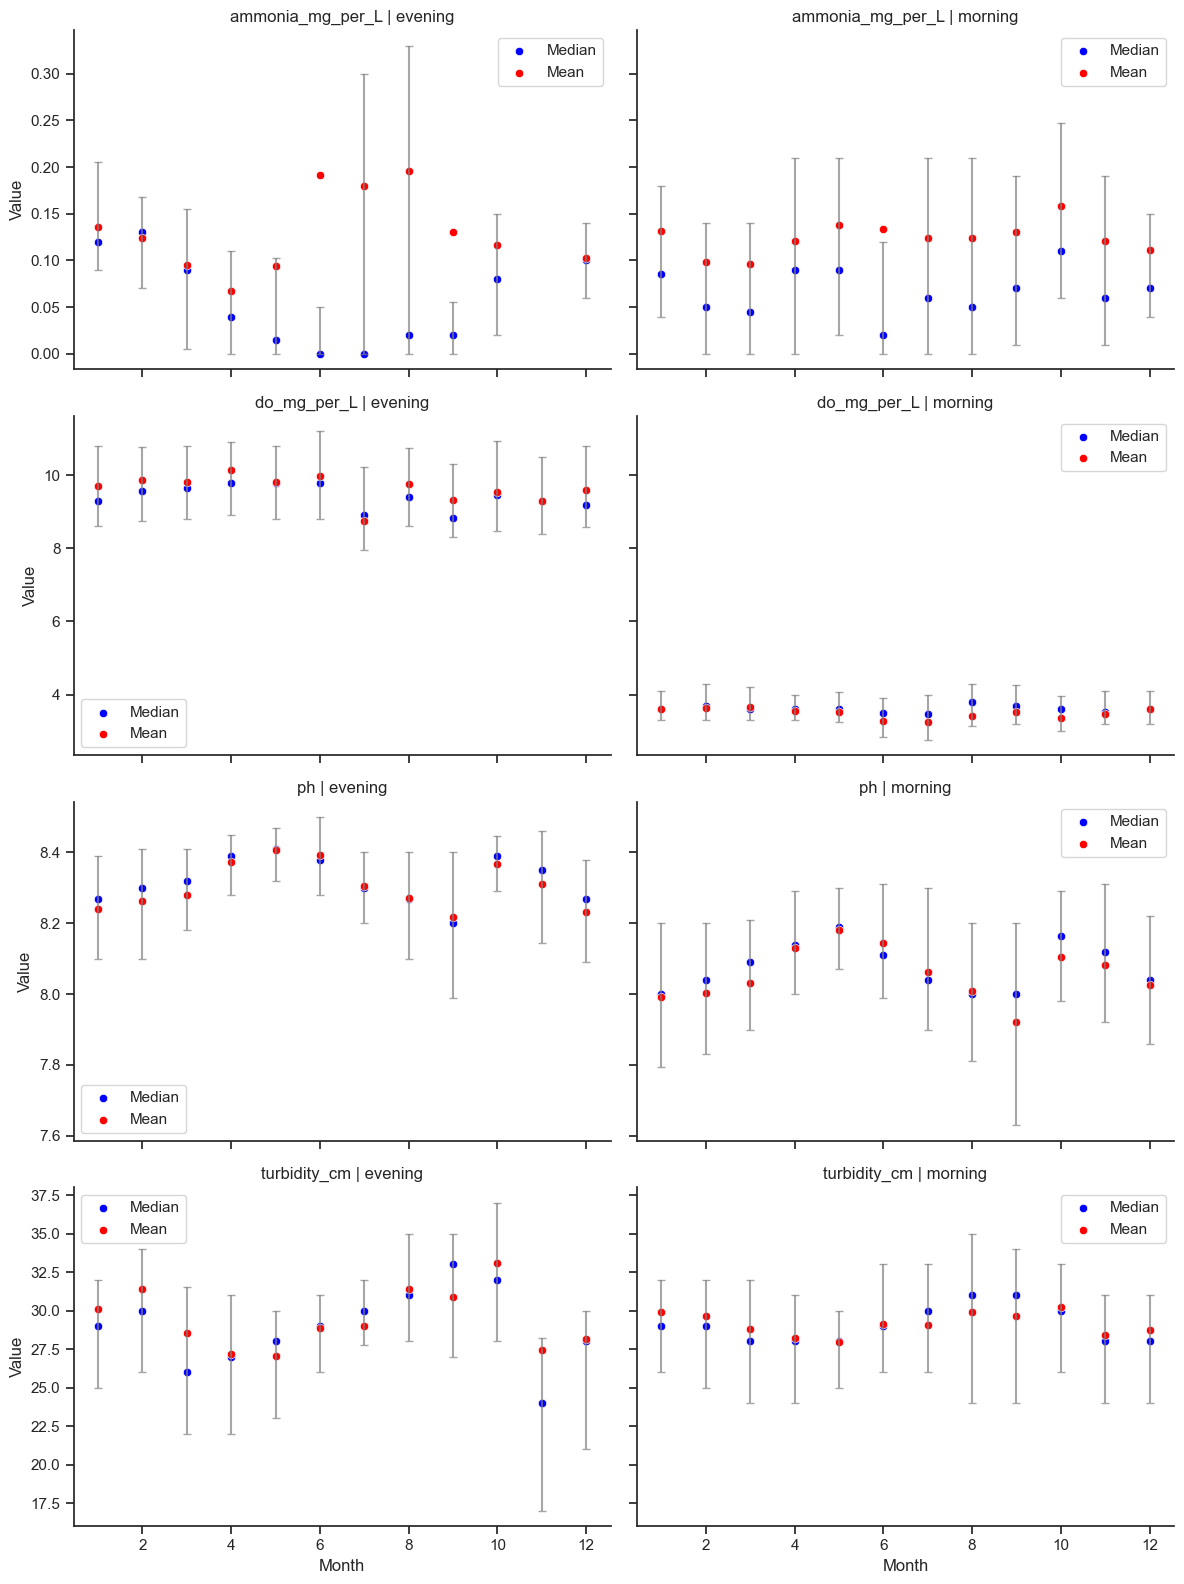

In [68]:
# Calculate statistics including Q1 and Q3 for IQR
monthly_summary = ara_long.groupby(['wq_param', 'time_of_day', 'month']).agg(
    mean=('value', 'mean'),
    median=('value', 'median'),
    q1=('value', lambda x: x.quantile(0.25)),
    q3=('value', lambda x: x.quantile(0.75))
).reset_index()

# Calculate the range (IQR) around the median
monthly_summary['iqr_lower'] = monthly_summary['q1']
monthly_summary['iqr_upper'] = monthly_summary['q3']

# Create FacetGrid
g = sns.FacetGrid(
    monthly_summary,
    col='time_of_day',
    row='wq_param',
    sharey='row',
    height=4,
    aspect=1.5
)

# Add scatterplot for medians and error bars for IQR
def plot_with_errorbars(data, **kwargs):
    ax = plt.gca()
    sns.scatterplot(data=data, x='month', y='median', ax=ax, **kwargs)
    ax.errorbar(
        data['month'], data['median'], 
        yerr=[data['median'] - data['iqr_lower'], data['iqr_upper'] - data['median']],
        fmt='none', c='gray', alpha=0.7, capsize=3
    )

g.map_dataframe(plot_with_errorbars, label='Median', color='blue')
g.map_dataframe(sns.scatterplot, x='month', y='mean', label='Mean', color='red')

# Adjust labels and titles
g.set_axis_labels("Month", "Value")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.tight_layout()

# Add a legend for the scatterplot
for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, loc='best')

There appear to be some seasonal trends for ph, but it's hard to tell for the others.